### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble
import matplotlib
matplotlib.rc_file_defaults()
import string

In [3]:
def sensitivity_test(parameter,region,x_type,load,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        region.compute_x(x_type=x_type,load=load,**args)
        region.compute_LE()
        region.compute_FIT()
        internal = region.results
        internal = internal.squeeze()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = (dataset.M_LE/(dataset.M_LE+dataset.Ibar_LE))*100
        
    return dataset

In [23]:
def merge_region_variable(ds1,ds2):
    regions = ['Seattle', 'Sydney', 'Lagos']
    lats = [51, 3.9, -25.2]
    lons = [10.5, 306.9, 133.7]
    region_dim = xr.DataArray(regions, coords={'region': regions})
    variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
    
    dataset = xr.concat([ds.sel(
        lat=xr.DataArray(lats, coords={'region': region_dim}), 
        lon=xr.DataArray(lons, coords={'region': region_dim}), 
        method='nearest'
    ) for ds in [ds1, ds2]], dim=variable_dim)
    
    return dataset 

In [24]:
def sensitivity_allregions(parameter,regions,x_type,load,args):
    regions = regions
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,x_type=x_type,load=load,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['Seattle', 'Sydney', 'Lagos']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

## Sensitivity plots for paper

#### Get Data 

In [6]:
regions_dict = {
    'Seattle': {'lat': 47.6, 'lon': 237.7},
    'Sydney':  {'lat': -33.8, 'lon': 151.2},
    'Lagos':  {'lat': 6.5, 'lon': 3.4},
}

In [7]:
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [10]:
region = 'Seattle' 
Seattle_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [11]:
region = 'Sydney' 
Sydney_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [12]:
region = 'Lagos' 
Lagos_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [13]:

region = 'Seattle' 
Seattle_tas = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [14]:
region = 'Sydney' 
Sydney_tas = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [15]:
region = 'Lagos' 
Lagos_tas = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

#### Hist slice

In [26]:
test_histslice_pr = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr,Sydney_pr,Lagos_pr],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

22.72510528564453


22.728958129882812



100%|██████████| 1/1 [00:00<00:00,  3.24it/s]



22.732376098632812


22.73876953125


22.736953735351562


22.738845825195312


22.733444213867188


22.737403869628906


22.735393524169922









100%|██████████| 1/1 [00:00<00:00,  2.13it/s]









22.741424560546875


22.731887817382812


22.738479614257812











100%|██████████| 1/1 [00:00<00:00,  4.54it/s]











22.734054565429688


22.736831665039062












100%|██████████| 1/1 [00:00<00:00,  2.99it/s]












22.730609893798828


22.710166931152344


22.7122802734375


22.725379943847656


100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

22.709590911865234


22.71770477294922


22.729755401611328


22.731678009033203





100%|██████████| 1/1 [00:00<00:00,  4.12it/s]





22.729297637939453


22.73440933227539


22.73257827758789


22.741107940673828


22.730487823486328









100%|██████████| 1/1 [00:00<00:00,  1.71it/s]









22.733936309814453


22.734119415283203










100%|██████████| 1/1 [00:00<00:00,  1.65it/s]










22.73306655883789


22.73538589477539


22.737979888916016












100%|██████████| 1/1 [00:00<00:00,  4.45it/s]












22.733585357666016


22.733421325683594


22.729400634765625














100%|██████████| 1/1 [00:00<00:00,  1.96it/s]














22.735122680664062














100%|██████████| 1/1 [00:00<00:00,  2.52it/s]














22.733627319335938














100%|██████████| 1/1 [00:00<00:00,  4.09it/s]














22.729324340820312


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

22.732093811035156


100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

22.726253509521484


22.704944610595703


22.708621978759766


22.715301513671875


22.71387481689453


22.701736450195312


22.719058990478516


22.722553253173828









100%|██████████| 1/1 [00:00<00:00,  4.01it/s]









22.719879150390625


22.726150512695312










100%|██████████| 1/1 [00:00<00:00,  2.38it/s]










22.725112915039062


22.73059844970703


22.72957992553711












100%|██████████| 1/1 [00:00<00:00,  3.81it/s]












22.734046936035156


22.723709106445312


22.730972290039062


22.726821899414062


22.733844757080078


100%|██████████| 1/1 [00:00<00:00,  1.18it/s]















  0%|          | 0/1 [00:00<?, ?it/s][A

22.729694366455078


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

22.735309600830078


22.72945785522461



100%|██████████| 1/1 [00:00<00:00,  2.45it/s]



22.738265991210938



100%|██████████| 1/1 [00:00<00:00,  1.96it/s]



22.728252410888672



100%|██████████| 1/1 [00:00<00:00,  4.34it/s]



22.732418060302734


22.73165512084961




100%|██████████| 1/1 [00:00<00:00,  2.98it/s]




22.72591781616211


22.707416534423828


22.706573486328125






100%|██████████| 1/1 [00:00<00:00,  3.82it/s]






22.714447021484375


22.715274810791016


22.716796875


22.72858428955078


22.734771728515625


22.73110580444336


22.73328399658203


22.72885513305664


In [27]:
test_histslice_tas = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas,Sydney_tas,Lagos_tas],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

































22.73693084716797


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]











  0%|          | 0/1 [00:00<?, ?it/s]

22.73520278930664


  0%|          | 0/1 [00:00<?, ?it/s]

22.731220245361328


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

22.73406219482422


22.735809326171875


22.734222412109375


22.732025146484375





100%|██████████| 1/1 [00:00<00:00,  3.74it/s]





22.736114501953125


22.731361389160156






100%|██████████| 1/1 [00:00<00:00,  2.52it/s]






22.732704162597656


22.72576904296875


22.73455810546875








100%|██████████| 1/1 [00:00<00:00,  4.92it/s]








22.7308349609375


22.73794937133789


22.734256744384766


22.710464477539062


22.71298599243164












100%|██████████| 1/1 [00:00<00:00,  3.08it/s]












22.7196044921875


22.715980529785156


22.71051025390625


100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

22.728984832763672


22.733482360839844



100%|██████████| 1/1 [00:00<00:00,  4.32it/s]



22.729637145996094


22.745681762695312


22.737201690673828


22.738418579101562


22.736522674560547







100%|██████████| 1/1 [00:00<00:00,  3.67it/s]







22.740459442138672


22.735836029052734


22.737567901611328


22.73501968383789


22.73699951171875











100%|██████████| 1/1 [00:00<00:00,  4.97it/s]











22.741329193115234


22.738391876220703


22.74163055419922













100%|██████████| 1/1 [00:00<00:00,  2.42it/s]













22.744510650634766













100%|██████████| 1/1 [00:00<00:00,  2.59it/s]













22.746234893798828













100%|██████████| 1/1 [00:00<00:00,  4.55it/s]













22.742542266845703


22.748516082763672














100%|██████████| 1/1 [00:00<00:00,  2.97it/s]














22.744823455810547


22.728073120117188


100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

22.721431732177734


100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


22.733592987060547


22.748348236083984


22.747669219970703


22.772380828857422


22.79644012451172






100%|██████████| 1/1 [00:00<00:00,  3.42it/s]






22.794597625732422


22.77260971069336


22.776756286621094


22.781414031982422


22.775699615478516


22.78820037841797


22.791748046875












100%|██████████| 1/1 [00:00<00:00,  2.36it/s]












22.794593811035156


22.793094635009766













100%|██████████| 1/1 [00:00<00:00,  2.22it/s]













22.792457580566406













100%|██████████| 1/1 [00:00<00:00,  3.64it/s]













22.80267333984375


22.796695709228516


22.798831939697266


100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

22.798458099365234


100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


22.807186126708984


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


22.803585052490234


22.809837341308594



100%|██████████| 1/1 [00:00<00:00,  3.10it/s]



22.80614471435547


22.781951904296875


22.78188705444336


22.781688690185547


22.778446197509766


22.77431869506836


22.796096801757812


22.794506072998047


22.799320220947266


22.8001708984375


22.80239486694336


In [28]:
variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
    
test_histslice = xr.concat([test_histslice_tas, test_histslice_pr], dim=variable_dim)

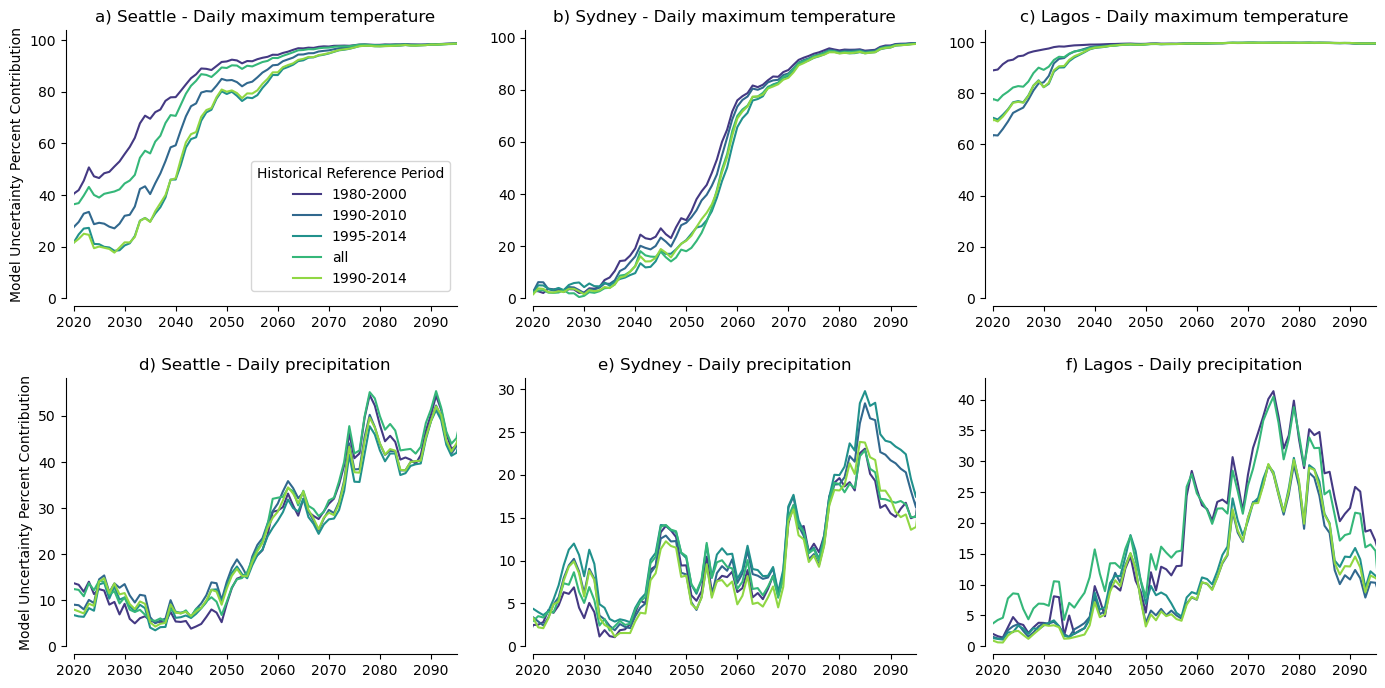

In [82]:
colors = sns.color_palette("viridis", len(test_histslice.concat_dim))
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice['variable'].values):
    for ir, r in enumerate(test_histslice.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice.concat_dim.values)):
            ax.plot(test_histslice.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

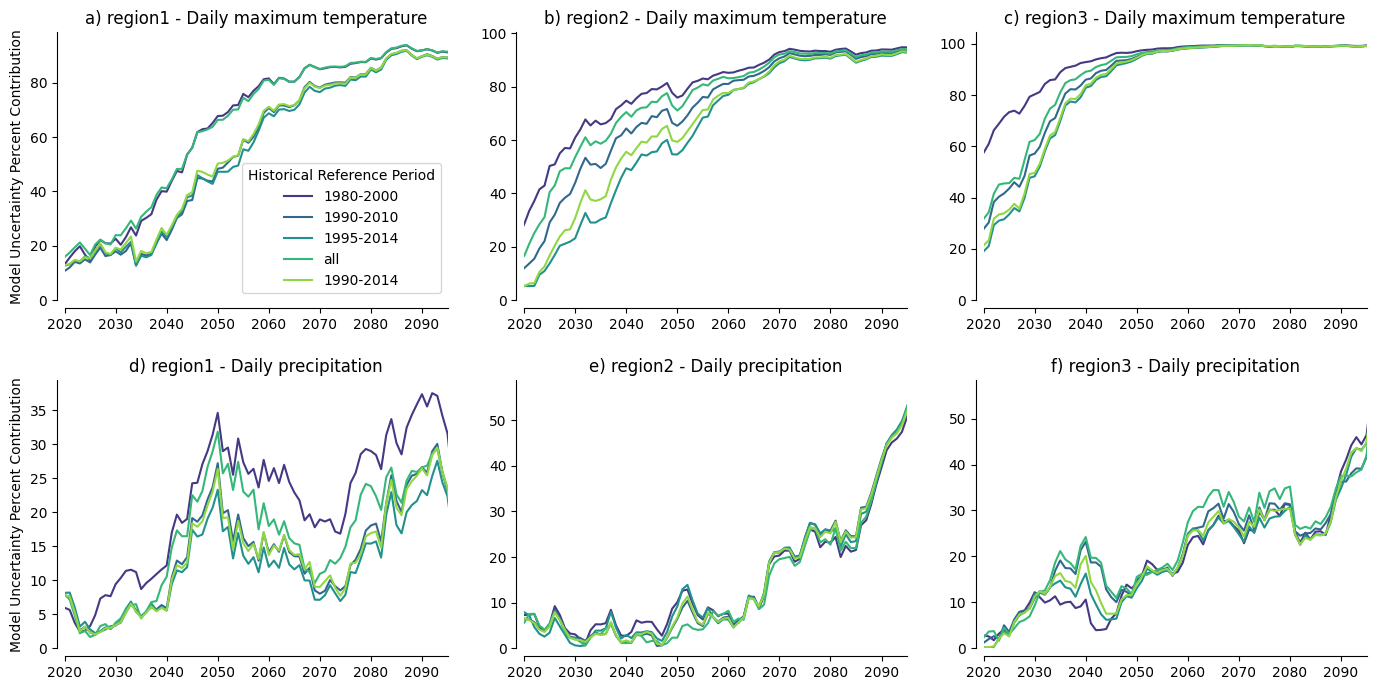

In [102]:
# 'non-qdm'

# Extreme events occurence

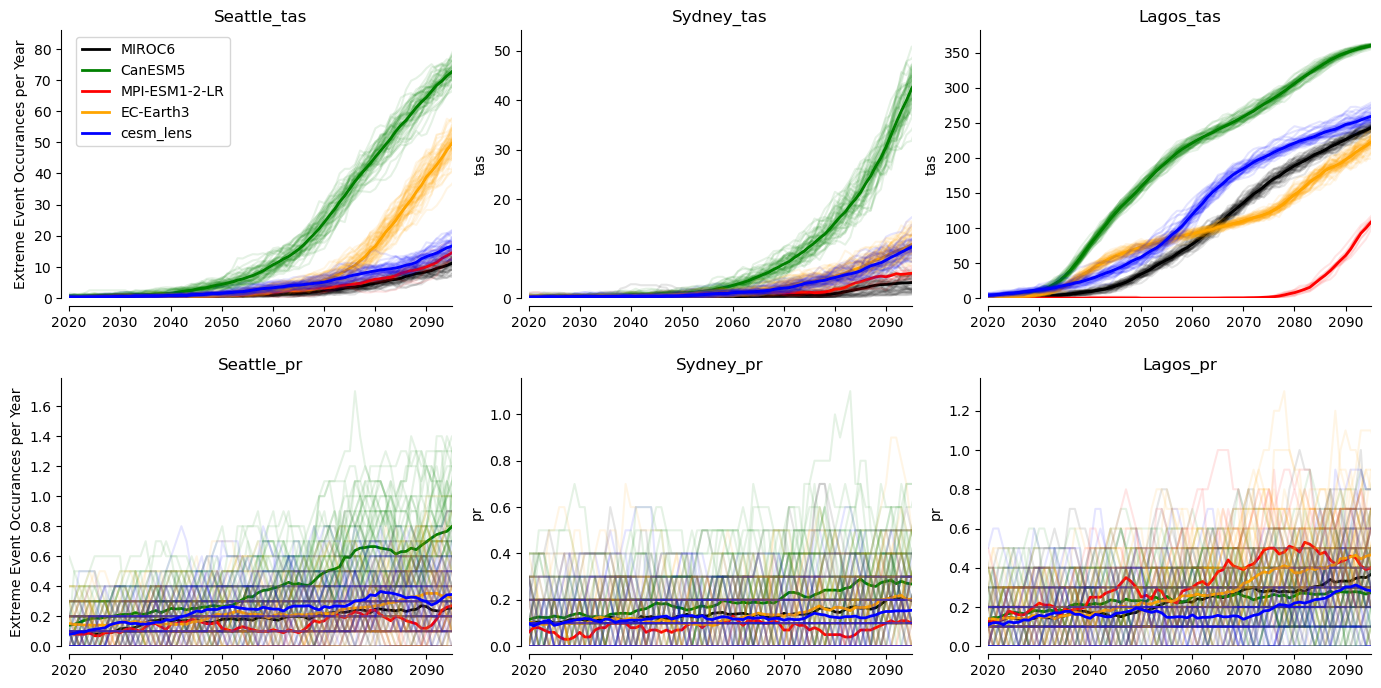

In [68]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas','Sydney_tas','Lagos_tas','Seattle_pr','Sydney_pr','Lagos_pr']

for ir, r in enumerate([Seattle_tas,Sydney_tas,Lagos_tas,Seattle_pr,Sydney_pr,Lagos_pr]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

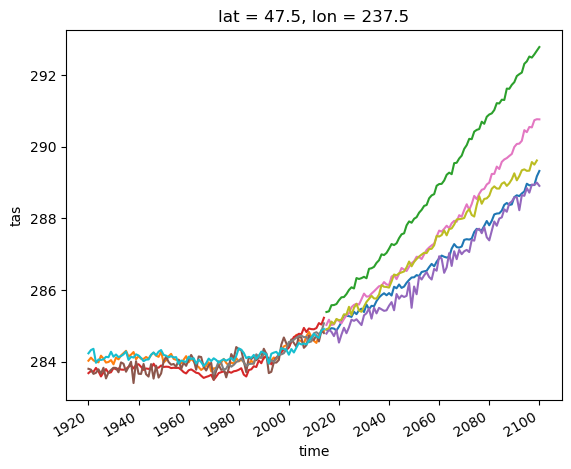

In [78]:
for model in Seattle_tas.future_dsets:
   Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

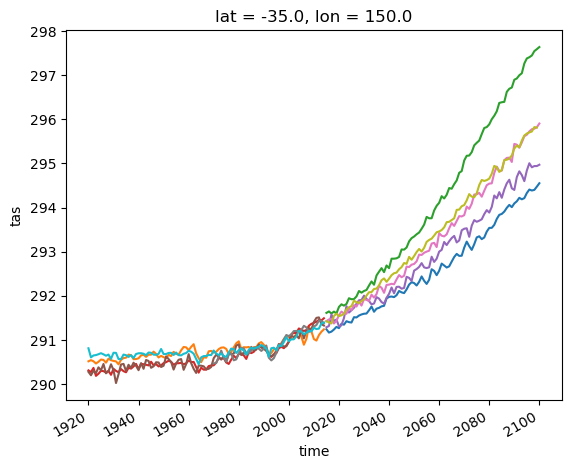

In [77]:
for model in Seattle_tas.future_dsets:
   Sydney_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Sydney_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()


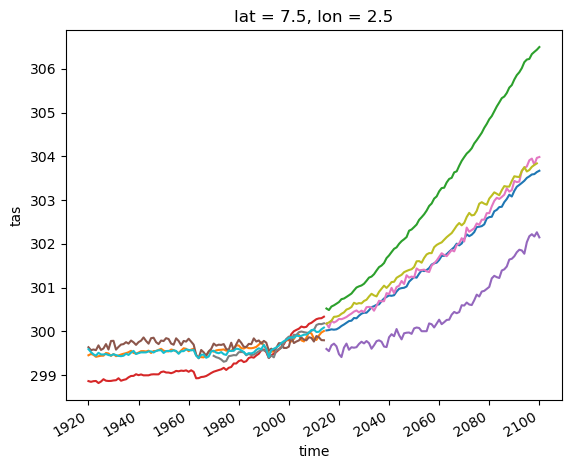

In [79]:
for model in Lagos_tas.future_dsets:
   Lagos_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Lagos_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

In [80]:
region = 'Lagos' 
Lagos_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tas', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

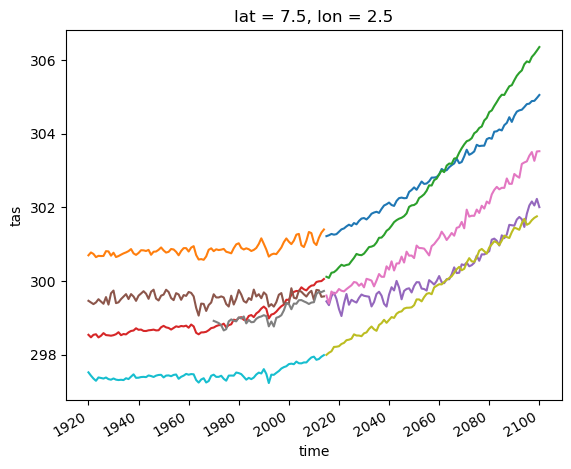

In [81]:
for model in Lagos_tas.future_dsets:
   Lagos_tas_no_Qdm.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Lagos_tas_no_Qdm.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()